In [1]:
import pandas as pd
import numpy as np

import os, glob, gzip

from IPython.display import SVG
from rdkit import Chem, rdBase, RDConfig
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem, rdShapeHelpers
from rdkit.Chem.FeatMaps import FeatMaps, FeatMapUtils
from rdkit.Chem.FeatMaps.FeatMapUtils import CombineFeatMaps

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'

In [4]:
df_x0072 = PandasTools.LoadSDF('Mpro-x0072_into_x0387.sdf.gz', molColName='Molecule')
print('Shape Mpro-x0072:', df_x0072.shape)
df_x0104 = PandasTools.LoadSDF('Mpro-x0104_into_x0387.sdf.gz', molColName='Molecule')
print('Shape Mpro-x0104:', df_x0104.shape)
df_x0107 = PandasTools.LoadSDF('Mpro-x0107_into_x0387.sdf.gz', molColName='Molecule')
print('Shape Mpro-x0107:', df_x0107.shape)

Shape Mpro-x0072: (20848, 55)
Shape Mpro-x0104: (23008, 55)
Shape Mpro-x0107: (46337, 55)


In [5]:
df = df_x0107
df.dtypes

CHROM.1                       object
EmbedRMS                      object
Hit                           object
Name                          object
RI                            object
Rbt.Current_Directory         object
Rbt.Executable                object
Rbt.Library                   object
Rbt.Parameter_File            object
Rbt.Receptor                  object
SCORE                         object
SCORE.INTER                   object
SCORE.INTER.CONST             object
SCORE.INTER.POLAR             object
SCORE.INTER.REPUL             object
SCORE.INTER.ROT               object
SCORE.INTER.VDW               object
SCORE.INTER.norm              object
SCORE.INTRA                   object
SCORE.INTRA.DIHEDRAL          object
SCORE.INTRA.DIHEDRAL.0        object
SCORE.INTRA.POLAR             object
SCORE.INTRA.POLAR.0           object
SCORE.INTRA.REPUL             object
SCORE.INTRA.REPUL.0           object
SCORE.INTRA.VDW               object
SCORE.INTRA.VDW.0             object
S

In [6]:
# Drop the columns we don't need and rename some

columns_to_remove = ['CHROM.1', 'RI', 'Rbt.Current_Directory', 'Rbt.Executable', 'Rbt.Library', 
                     'Rbt.Parameter_File', 'Rbt.Receptor', 'Name', 'SCORE.INTER', 'SCORE.INTER.CONST',
                     'SCORE.INTER.POLAR', 'SCORE.INTER.REPUL', 'SCORE.INTER.ROT', 'SCORE.INTER.VDW',
                     'SCORE.INTER.norm', 'SCORE.INTRA', 'SCORE.INTRA.DIHEDRAL', 'SCORE.INTRA.DIHEDRAL.0',
                     'SCORE.INTRA.POLAR', 'SCORE.INTRA.POLAR.0', 'SCORE.INTRA.REPUL', 'SCORE.INTRA.REPUL.0',
                     'SCORE.INTRA.VDW', 'SCORE.INTRA.VDW.0', 'SCORE.INTRA.norm', 'SCORE.RESTR',
                     'SCORE.RESTR.norm', 'SCORE.SYSTEM', 'SCORE.SYSTEM.CONST', 'SCORE.SYSTEM.DIHEDRAL',
                     'SCORE.SYSTEM.norm','SCORE.RESTR.CAVITY','Max_SuCOS_Cluster','Max_SuCOS_Index'
                    ]

columns_to_rename = { 'ID': 'NSMILES'} # NSMILES means Neutral SMILES e.g. prior to charge enumeration

df2 = df.drop(columns=columns_to_remove)
df2 = df2.rename(columns=columns_to_rename)

df2 = df2.astype(dtype= {
    "SuCOS_Score":"float64",
    "SuCOS_FeatureMap_Score":"float64",
    "SuCOS_Protrude_Score":"float64",
    "SCORE":"float64",
    "SCORE.norm":"float64",
    "TransFSScore_10nM":"float64",
    "TransFSScore_50nM":"float64",
    "TransFSScore_200nM":"float64",
    "TransFSScore_1uM":"float64",
    "Max_SuCOS_Score":"float64",
    "Max_SuCOS_FeatureMap_Score":"float64",
    "Max_SuCOS_Protrude_Score":"float64",
    "Cum_SuCOS_Score":"float64",
    "Cum_SuCOS_FeatureMap_Score":"float64",
    "Cum_SuCOS_Protrude_Score":"float64"
})

df2.dtypes

EmbedRMS                       object
Hit                            object
SCORE                         float64
SCORE.heavy                    object
SCORE.norm                    float64
TETHERED ATOMS                 object
SuCOS_Score                   float64
SuCOS_FeatureMap_Score        float64
SuCOS_Protrude_Score          float64
Max_SuCOS_Score               float64
Max_SuCOS_FeatureMap_Score    float64
Max_SuCOS_Protrude_Score      float64
Cum_SuCOS_Score               float64
Cum_SuCOS_FeatureMap_Score    float64
Cum_SuCOS_Protrude_Score      float64
TransFSScore_50nM             float64
TransFSScore_1uM              float64
TransFSScore_10nM             float64
TransFSScore_200nM            float64
NSMILES                        object
Molecule                       object
dtype: object

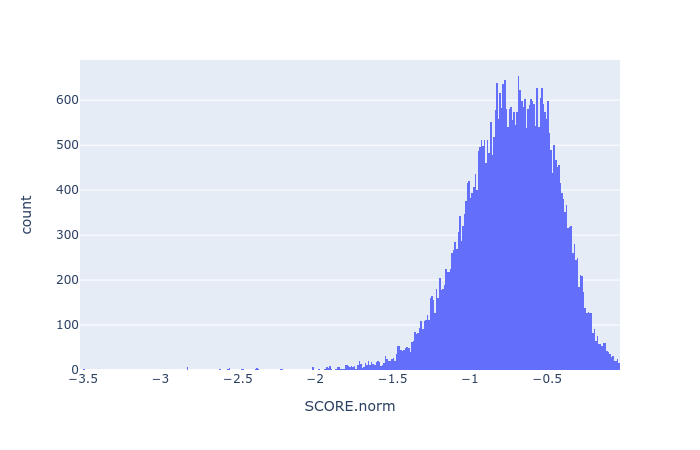

In [7]:
# Let's look at the distribution of scores
fig = px.histogram(df2, x="SCORE.norm")
fig.show()

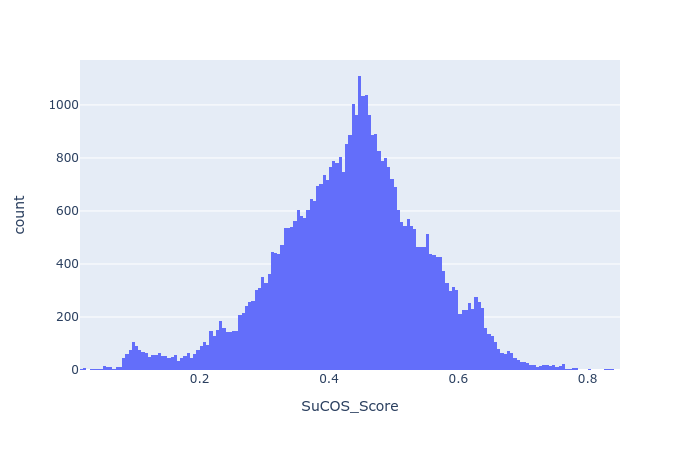

In [8]:
fig = px.histogram(df2, x="SuCOS_Score")
fig.show()

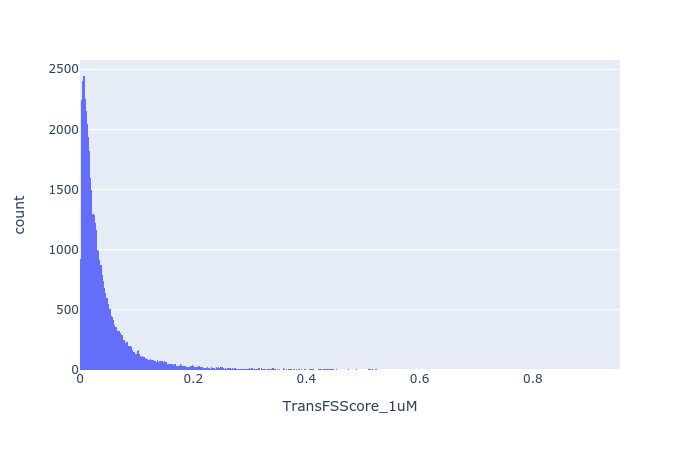

In [9]:
fig = px.histogram(df2, x="TransFSScore_1uM")
fig.show()

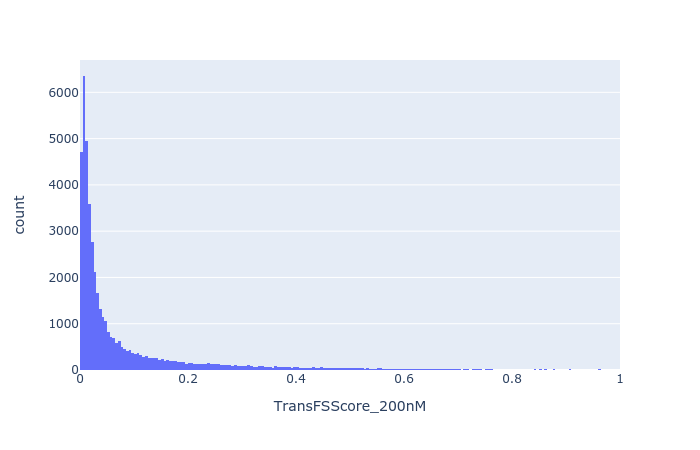

In [10]:
fig = px.histogram(df2, x="TransFSScore_200nM")
fig.show()

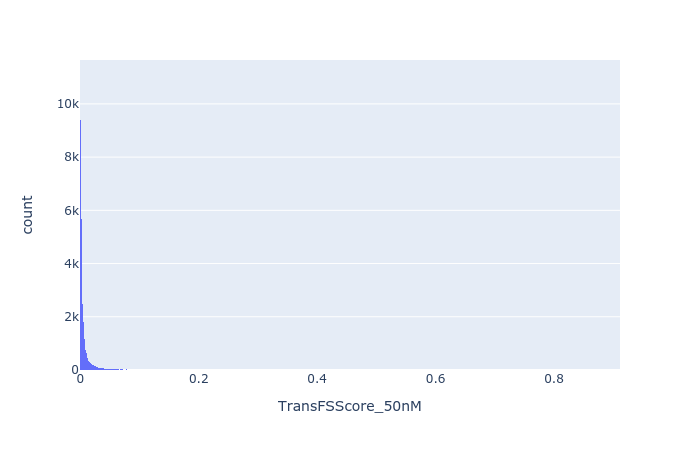

In [11]:
fig = px.histogram(df2, x="TransFSScore_50nM")
fig.show()

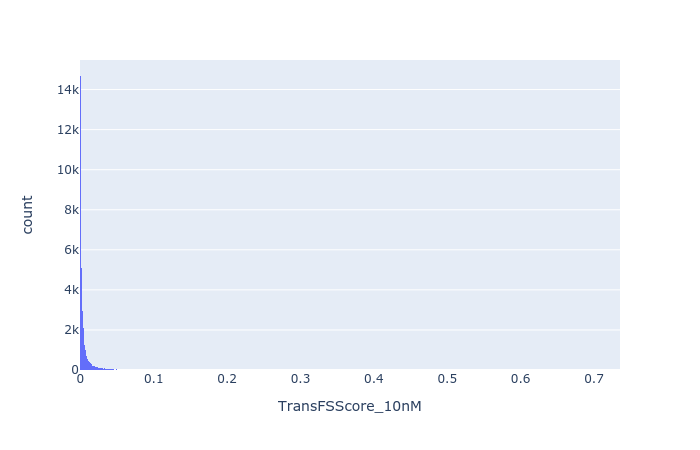

In [12]:
fig = px.histogram(df2, x="TransFSScore_10nM")
fig.show()

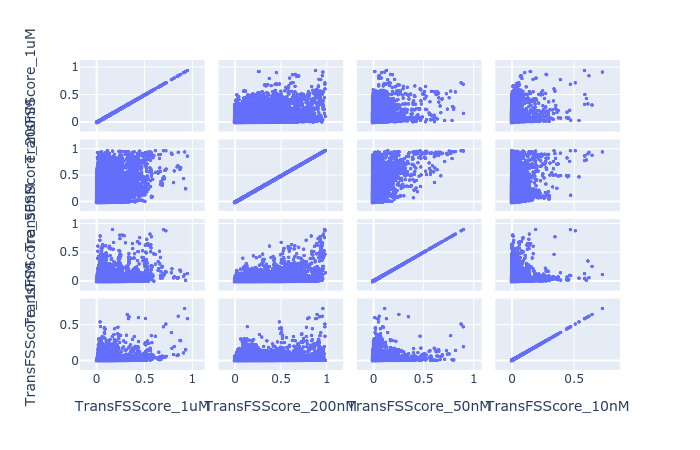

In [13]:
fig = px.scatter_matrix(df2, dimensions=['TransFSScore_1uM','TransFSScore_200nM','TransFSScore_50nM','TransFSScore_10nM'])
fig.update_traces(marker=dict(size=3))
fig.show()

In [14]:
# generate the average of the TransFSScores
df2['TransFSScore'] = (df2['TransFSScore_1uM'] + df2['TransFSScore_200nM'] + df2['TransFSScore_50nM'] + df2['TransFSScore_10nM']) / 4

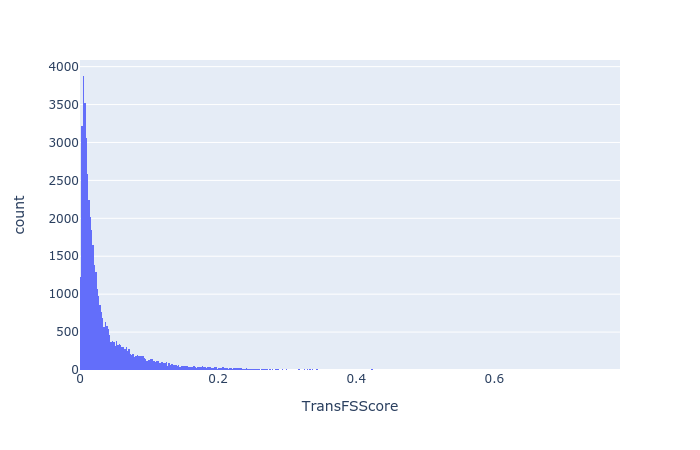

In [15]:
fig = px.histogram(df2, x="TransFSScore")
fig.show()

## SuCOSStein calculations

In [16]:
# This is pretty well exact copy and paste from the SuCOS code in the Squonk Pipelines project:
# https://github.com/InformaticsMatters/pipelines/blob/master/src/python/pipelines/rdkit/sucos.py
# This code needs improving!!!

# Setting up the features to use in FeatureMap
ffact = AllChem.BuildFeatureFactory(os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef'))

fmParams = {}
for k in ffact.GetFeatureFamilies():
    fparams = FeatMaps.FeatMapParams()
    fmParams[k] = fparams

keep = ('Donor', 'Acceptor', 'NegIonizable', 'PosIonizable',
        'Aromatic', 'Hydrophobe', 'LumpedHydrophobe')

def filterFeature(f):
    result = f.GetFamily() in keep
    # TODO - nothing ever seems to be filtered. Is this expected?
    #if not result:
    #    print("Filtered out feature type", f.GetFamily())
    return result

def getRawFeatures(mol):
    rawFeats = ffact.GetFeaturesForMol(mol)
    # filter that list down to only include the ones we're interested in
    filtered = list(filter(filterFeature, rawFeats))
    return filtered

def getFeatureMap(mol):
    feats = getRawFeatures(mol)
    return FeatMaps.FeatMap(feats=feats, weights=[1]*len(feats),params=fmParams)

In [17]:
# Read the 22 non-covalent hits
supplr = Chem.ForwardSDMolSupplier(gzip.open('../Mpro_22_data/hits-22.sdf.gz'))
hits = [m for m in supplr]
len(hits)

22

In [20]:
# simplistic merging - merge in the order the molecules are in the file
featMaps = []
total_feature_count = 0
for mol in hits:
    featMap = getFeatureMap(mol)
    print('Processing mol', mol.GetProp('_Name'), 'found', featMap.GetNumFeatures())
    total_feature_count += featMap.GetNumFeatures()
    featMaps.append(featMap)
print('Generated', total_feature_count, 'features')

fstein = None
for featMap in featMaps:
    #print(featMap)
    if not fstein:
        fstein = featMap
    else:
        fstein = CombineFeatMaps(fstein, featMap,  mergeMetric=1, mergeTol=1.5, dirMergeMode=1)
        
print(fstein)

# 156 features are merged down to 88.

Processing mol Mpro-x0072_0 found 7
Processing mol Mpro-x0104_0 found 10
Processing mol Mpro-x0107_0 found 5
Processing mol Mpro-x0161_0 found 9
Processing mol Mpro-x0195_0 found 7
Processing mol Mpro-x0305_0 found 4
Processing mol Mpro-x0354_0 found 8
Processing mol Mpro-x0387_0 found 7
Processing mol Mpro-x0395_0 found 6
Processing mol Mpro-x0397_0 found 5
Processing mol Mpro-x0426_0 found 10
Processing mol Mpro-x0434_0 found 7
Processing mol Mpro-x0540_0 found 7
Processing mol Mpro-x0678_0 found 7
Processing mol Mpro-x0874_0 found 8
Processing mol Mpro-x0946_0 found 7
Processing mol Mpro-x0967_0 found 12
Processing mol Mpro-x0991_0 found 3
Processing mol Mpro-x0995_0 found 4
Processing mol Mpro-x1077_0 found 3
Processing mol Mpro-x1093_0 found 12
Processing mol Mpro-x1249_0 found 8
Generated 156 features
  1        Donor  8.4960 -3.4980  24.5920  1.0000
  2     Acceptor  7.1910 -5.0190  26.2290  1.0000
  3     Acceptor  8.4485 -3.1780  26.7635  1.0000
  4     Aromatic  11.9191 -0.39

In [21]:
# now generate the SuCOSStein scores
def gen_score(mol):
    featMap = getFeatureMap(mol)
    return featMap.ScoreFeats(fstein.GetFeatures()) / featMap.GetNumFeatures()

df2['SuCOSStein'] = df2['Molecule'].apply(gen_score)
df2.dtypes

EmbedRMS                       object
Hit                            object
SCORE                         float64
SCORE.heavy                    object
SCORE.norm                    float64
TETHERED ATOMS                 object
SuCOS_Score                   float64
SuCOS_FeatureMap_Score        float64
SuCOS_Protrude_Score          float64
Max_SuCOS_Score               float64
Max_SuCOS_FeatureMap_Score    float64
Max_SuCOS_Protrude_Score      float64
Cum_SuCOS_Score               float64
Cum_SuCOS_FeatureMap_Score    float64
Cum_SuCOS_Protrude_Score      float64
TransFSScore_50nM             float64
TransFSScore_1uM              float64
TransFSScore_10nM             float64
TransFSScore_200nM            float64
NSMILES                        object
Molecule                       object
TransFSScore                  float64
SuCOSStein                    float64
dtype: object

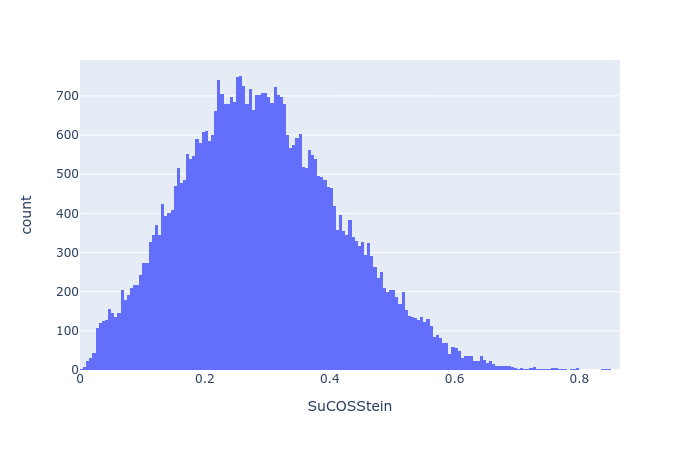

In [26]:
fig = px.histogram(df2, x="SuCOSStein")
fig.show()

## Correlation of scores

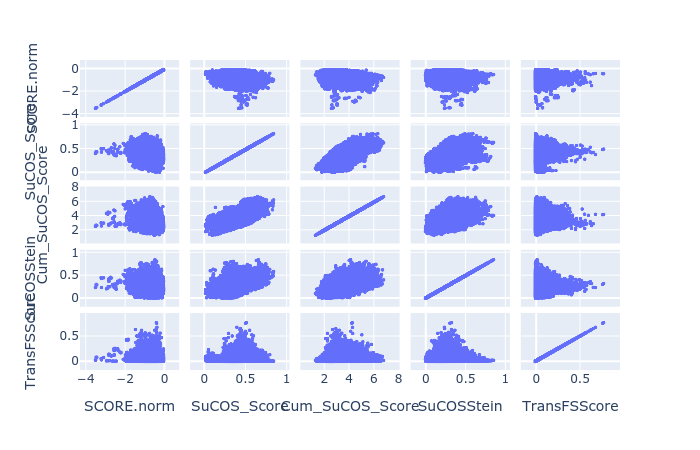

In [22]:
# Compare the average TranFS Score with the normalised docking score and the SuCOS score
fig = px.scatter_matrix(df2, dimensions=['SCORE.norm', 'SuCOS_Score', 'Cum_SuCOS_Score', 'SuCOSStein', 'TransFSScore'])
fig.update_traces(marker=dict(size=3))
fig.show()

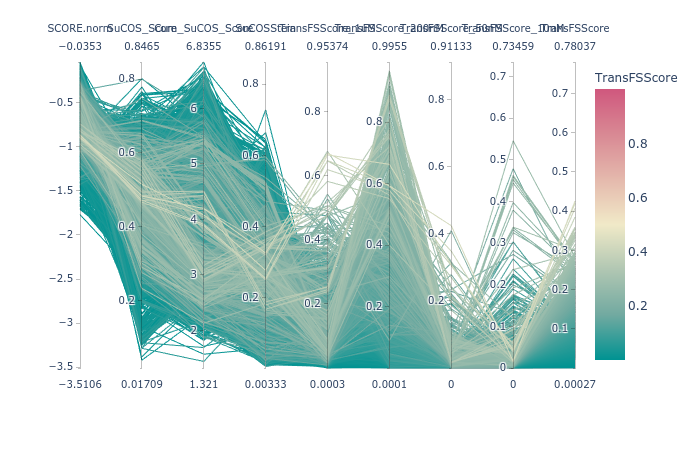

In [23]:
fig = px.parallel_coordinates(df2, color="TransFSScore", 
                dimensions=['SCORE.norm', 'SuCOS_Score', 'Cum_SuCOS_Score', 'SuCOSStein', 'TransFSScore_1uM','TransFSScore_200nM','TransFSScore_50nM','TransFSScore_10nM', 'TransFSScore'],              
                color_continuous_scale=px.colors.diverging.Tealrose,
                color_continuous_midpoint=0.5,
                width=1200,
                height=400
            )
fig.show()

In [24]:
df_best = df2[(df2['TransFSScore'] > 0.2) & (df2['SuCOSStein'] > 0.4)]
df_best.shape

(147, 23)

,EmbedRMS,Hit,SCORE,SCORE.heavy,SCORE.norm,TETHERED ATOMS,SuCOS_Score,SuCOS_FeatureMap_Score,SuCOS_Protrude_Score,Max_SuCOS_Score,...,Cum_SuCOS_FeatureMap_Score,Cum_SuCOS_Protrude_Score,TransFSScore_50nM,TransFSScore_1uM,TransFSScore_10nM,TransFSScore_200nM,NSMILES,Molecule,TransFSScore,SuCOSStein
1020,0.03834625215429836,Mpro-x0107_0,-14.8120,18,-0.822888,"12,13,14,15,16,17,18",0.686744,0.530385,0.843103,0.686744,...,2.683485,8.238177,0.054609,0.071011,0.021030,0.751683,CCCN(CC1CC1)C(CN)c1cnccc1C,,0.224583,0.410321
1021,0.03834625215429836,Mpro-x0107_0,-14.7608,18,-0.820042,"12,13,14,15,16,17,18",0.688406,0.524664,0.852149,0.688406,...,2.715573,8.263917,0.047400,0.072677,0.020878,0.738371,CCCN(CC1CC1)C(CN)c1cnccc1C,,0.219831,0.418310
2945,0.023999786620515808,Mpro-x0107_0,-11.4481,15,-0.763204,"9,10,11,12,13,14,15",0.559145,0.334010,0.784280,0.559145,...,2.436107,8.297689,0.011169,0.055780,0.016762,0.844597,COC(C1CC1)C(N)c1cnccc1C,,0.232077,0.514227
2946,0.023999786620515808,Mpro-x0107_0,-11.4410,15,-0.762733,"9,10,11,12,13,14,15",0.570216,0.357635,0.782796,0.570216,...,2.482248,8.251470,0.008400,0.050180,0.018840,0.864463,COC(C1CC1)C(N)c1cnccc1C,,0.235471,0.518397
2947,0.023999786620515808,Mpro-x0107_0,-11.4201,15,-0.761338,"9,10,11,12,13,14,15",0.570718,0.354943,0.786494,0.570718,...,2.467701,8.255645,0.009476,0.050944,0.023629,0.871548,COC(C1CC1)C(N)c1cnccc1C,,0.238899,0.521402

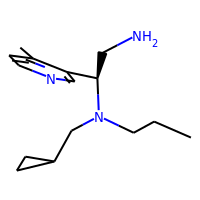
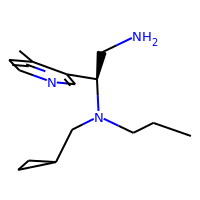
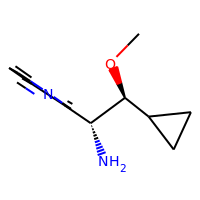
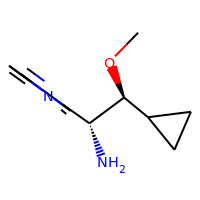
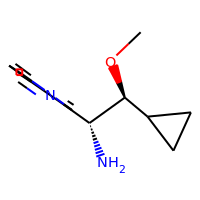

In [25]:
df_best.head()